In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras import regularizers
from tensorflow.keras.optimizers import Adam

2024-10-06 18:26:15.629245: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-06 18:26:15.832226: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-06 18:26:16.040064: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-06 18:26:16.230280: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-06 18:26:16.270870: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-06 18:26:16.587130: I tensorflow/core/platform/cpu_feature_gu

In [2]:
train_dir = "./train" 
test_dir = "./test" 
img_size = 48

In [3]:
train_datagen = ImageDataGenerator(
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [4]:

train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [13]:
model1= Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())

model1.add(Dense(7, activation='softmax'))

model1.compile(
    optimizer=Adam(), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [14]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │       258,055 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,127 (1.06 MB)

 Trainable params: 276,999 (1.06 MB)

 Non-trainable params: 128 (512.00 B)

In [18]:
history1 = model1.fit(x = train_generator,epochs = 20,validation_data = validation_generator)

Epoch 1/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 96s 266ms/step - accuracy: 0.4378 - loss: 1.4696 - val_accuracy: 0.4818 - val_loss: 1.3681
Epoch 2/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 93s 259ms/step - accuracy: 0.4351 - loss: 1.4806 - val_accuracy: 0.4693 - val_loss: 1.4181
Epoch 3/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 92s 256ms/step - accuracy: 0.4359 - loss: 1.4732 - val_accuracy: 0.4944 - val_loss: 1.3870
Epoch 4/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 92s 256ms/step - accuracy: 0.4430 - loss: 1.4619 - val_accuracy: 0.4881 - val_loss: 1.3850
Epoch 5/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 92s 255ms/step - accuracy: 0.4437 - loss: 1.4633 - val_accuracy: 0.4784 - val_loss: 1.4056
Epoch 6/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 92s 256ms/step - accuracy: 0.4329 - loss: 1.4691 - val_accuracy: 0.4965 - val_loss: 1.3617
Epoch 7/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 92s 255ms/step - accuracy: 0.4433 - loss: 1.4544 - val_accuracy: 0.4784 - val_loss: 1.3916
Epoch 8/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 92s 257ms/step - accuracy: 0.4410 - loss: 1

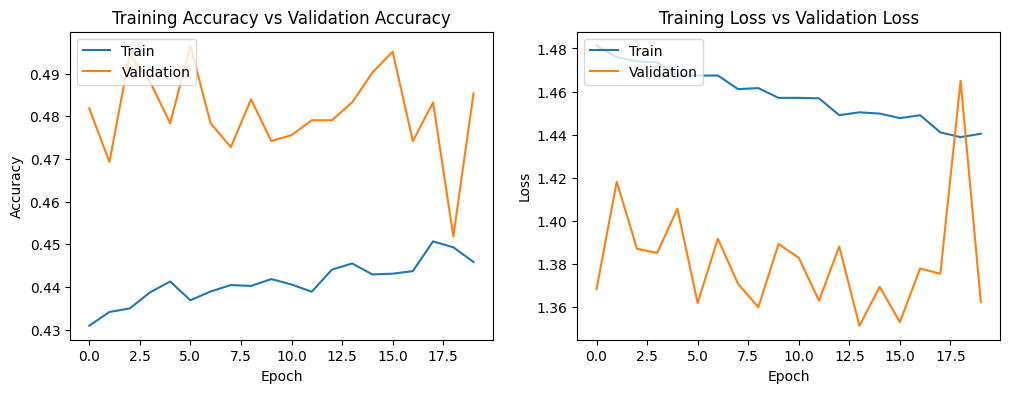

In [19]:
fig , ax = plt.subplots(1,2)
train_acc = history1.history['accuracy']
train_loss = history1.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history1.history['accuracy'])
ax[0].plot(history1.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history1.history['loss'])
ax[1].plot(history1.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

In [23]:
model2= Sequential()
model2.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())

model2.add(Dense(7, activation='softmax'))

model2.compile(
    optimizer = Adam(), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [24]:
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 48, 48, 256)    │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 48, 48, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 147456)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │     1,032,199 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,035,783 (3.95 MB)

 Trainable params: 1,035,271 (3.95 MB)

 Non-trainable params: 512 (2.00 KB)

In [26]:
history2 = model2.fit(x = train_generator,epochs = 20,validation_data = validation_generator)

Epoch 1/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 295s 821ms/step - accuracy: 0.2717 - loss: 2.0271 - val_accuracy: 0.2772 - val_loss: 1.7792
Epoch 2/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 296s 823ms/step - accuracy: 0.3267 - loss: 1.6910 - val_accuracy: 0.3303 - val_loss: 1.7006
Epoch 3/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 300s 834ms/step - accuracy: 0.3522 - loss: 1.6565 - val_accuracy: 0.3715 - val_loss: 1.5983
Epoch 4/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 296s 822ms/step - accuracy: 0.3625 - loss: 1.6348 - val_accuracy: 0.4197 - val_loss: 1.5137
Epoch 5/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 306s 850ms/step - accuracy: 0.3691 - loss: 1.6189 - val_accuracy: 0.3296 - val_loss: 1.7150
Epoch 6/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 285s 791ms/step - accuracy: 0.3657 - loss: 1.6272 - val_accuracy: 0.4267 - val_loss: 1.5209
Epoch 7/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 329s 914ms/step - accuracy: 0.3799 - loss: 1.6078 - val_accuracy: 0.4127 - val_loss: 1.5868
Epoch 8/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 333s 926ms/step - accuracy: 0.3831 -

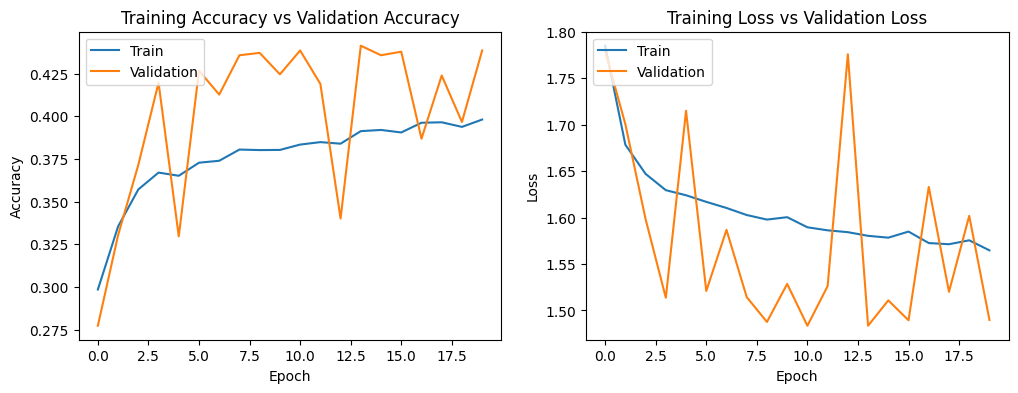

In [27]:
fig , ax = plt.subplots(1,2)
train_acc = history2.history['accuracy']
train_loss = history2.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history2.history['accuracy'])
ax[0].plot(history2.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history2.history['loss'])
ax[1].plot(history2.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

In [28]:
batch_size = 64

(48, 48)


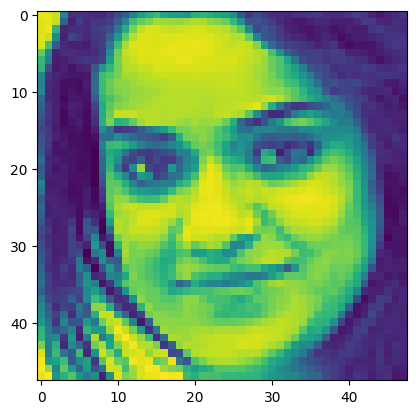

In [31]:
img = image.load_img("./test/happy/im1.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) 

In [32]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

# Predicción Modelo 1

In [40]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result1 = model1.predict(img)
result1 = list(result1[0])
print(result1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]


In [41]:
img_index = result1.index(max(result1))
print(label_dict[img_index])
plt.show()

Fear


# Predicción Modelo 2

In [48]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result2 = model2.predict(img)
result2 = list(result2[0])
print(result2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]


In [49]:
img_index = result2.index(max(result2))
print(label_dict[img_index])
plt.show()

Happy


# Resumen de Precisón de Modelos

In [44]:
train_loss1, train_acc1 = model1.evaluate(train_generator)
test_loss1, test_acc1 = model1.evaluate(validation_generator)
print('MODELO 1')
print("Precisión de entrenmaiento final = {:.2f} , Precisión de Validación = {:.2f}".format(train_acc1*100, test_acc1*100))

359/359 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.4643 - loss: 1.3947
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.4929 - loss: 1.3474
MODELO 1
Precisión de entrenmaiento final = 46.44 , Precisión de Validación = 48.53


In [45]:
train_loss2, train_acc2 = model2.evaluate(train_generator)
test_loss2, test_acc2   = model2.evaluate(validation_generator)
print('MODELO 2')
print("Precisión de entrenmaiento final = {:.2f} , Precisión de Validación = {:.2f}".format(train_acc2*100, test_acc2*100))

359/359 ━━━━━━━━━━━━━━━━━━━━ 44s 123ms/step - accuracy: 0.4035 - loss: 1.5546
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.4185 - loss: 1.5155
MODELO 2
Precisión de entrenmaiento final = 40.85 , Precisión de Validación = 43.85


# Prueba con Imagen mia

In [52]:
def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(48, 48), color_mode="grayscale")
    img = np.array(img)
    plt.imshow(img, cmap='gray')  # Mostrar imagen en escala de grises
    print("Shape de la imagen:", img.shape) 
    img = np.expand_dims(img, axis=0)  # Cambia la forma de la imagen a (1, 48, 48)
    img = img.reshape(1, 48, 48, 1)
    result = model.predict(img)
    result = list(result[0])
    print("Resultados de la predicción:", result)
    img_index = result.index(max(result))
    print("Predicción:", label_dict[img_index])
    plt.show()

### Modelo 1

Shape de la imagen: (48, 48)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Resultados de la predicción: [0.0, 0.0, 0.0, 0.0, 6.281339e-27, 0.0, 1.0]
Predicción: Surprise


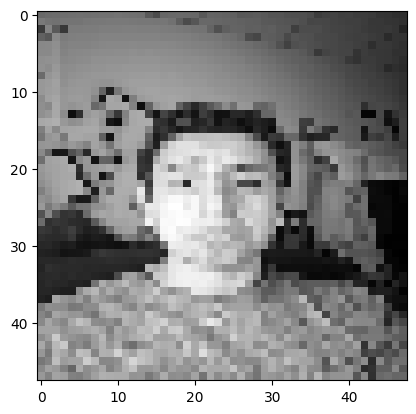

In [53]:
img_path1 = './triste_yo.jpeg'
predict_image(model1, img_path1)

Shape de la imagen: (48, 48)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Resultados de la predicción: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
Predicción: Surprise


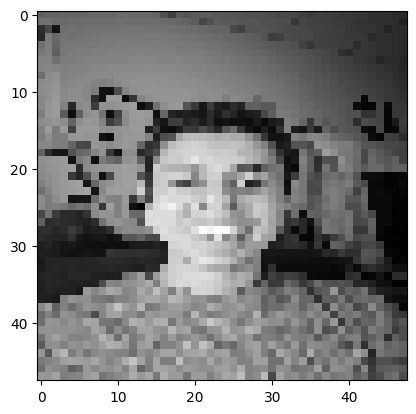

In [54]:
img_path2 = './feliz_yo.jpeg'
predict_image(model1, img_path2)

### Modelo 2

Shape de la imagen: (48, 48)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Resultados de la predicción: [1.0, 0.0, 0.0, 4.03911e-27, 0.0, 0.0, 0.0]
Predicción: Angry


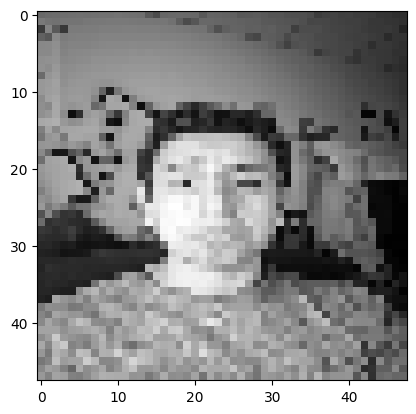

In [55]:
img_path1 = './triste_yo.jpeg'
predict_image(model2, img_path1)

Shape de la imagen: (48, 48)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Resultados de la predicción: [1.0, 0.0, 1.07585374e-26, 0.0, 0.0, 0.0, 0.0]
Predicción: Angry


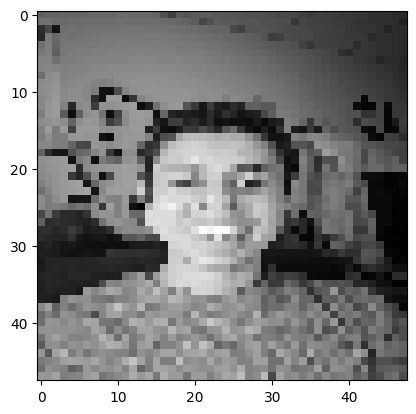

In [56]:
img_path2 = './feliz_yo.jpeg'
predict_image(model2, img_path2)